#Imports

In [117]:
# pip install wandb

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM, GRU, Bidirectional
from keras.models import Sequential
from datetime import datetime
import torch.nn as nn
import torch.optim as optim
import torch
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
plt.rcParams.update({'font.size': 20})
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import LSTM, GRU, Bidirectional, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import wandb


# Loading Files

In [16]:


# Load the data without parsing the dates
data = pd.read_csv('/Users/aayushshukla/Desktop/usedata.txt', sep='\t')

# Convert the 'Date Time' column to datetime
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%d/%m/%y %H:%M')


# Merging Rainfall and Runoff data

In [17]:
X = data[['Rainfall Depth [mm]']].values
y = data[['Flow Rate [lps]']].values
y[np.isnan(y)] = 0.0

# Runfall Runoff Relation Representation

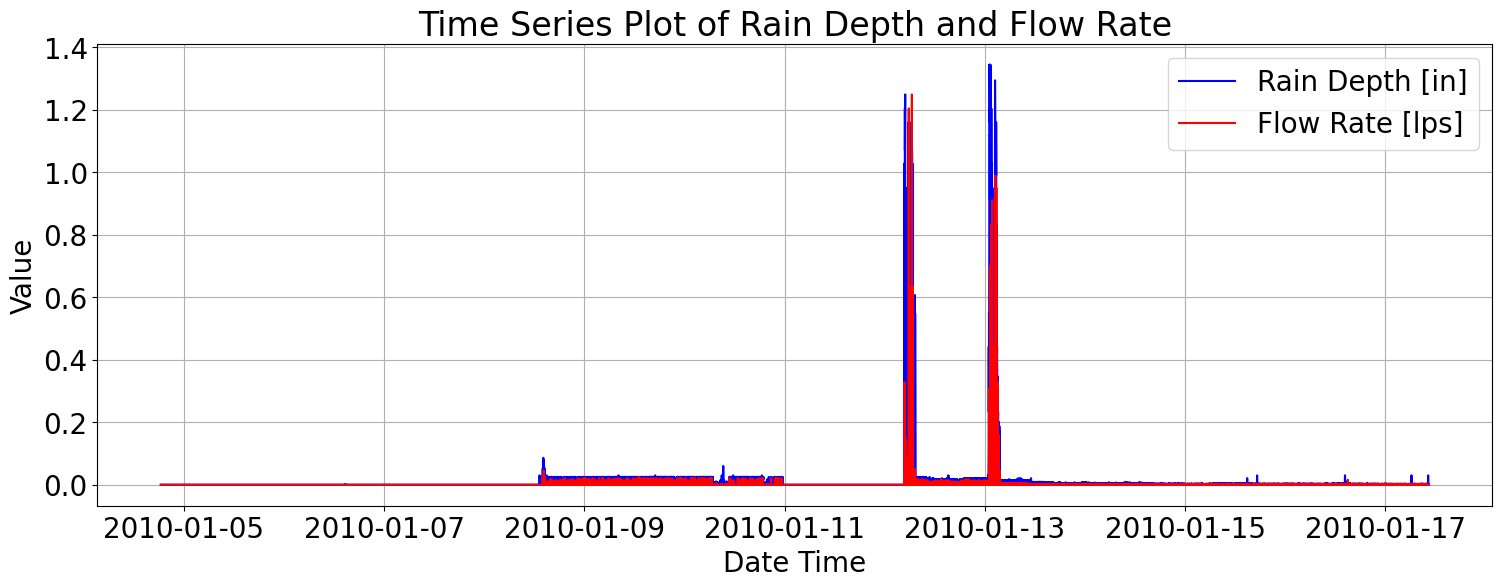

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(data['Date Time'], X, label='Rain Depth [in]', color='b')
plt.plot(data['Date Time'], y, label='Flow Rate [lps]', color='r')
plt.title('Time Series Plot of Rain Depth and Flow Rate')
plt.xlabel('Date Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()




# Test train split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)

In [20]:
X.shape

(18240, 1)

In [21]:
y.shape

(18240, 1)

# Implementing LSTM, GRU and Bidirectional LSTM model

In [22]:
input_shape = (X_train_scaled.shape[1], 1)
lstm_model = Sequential()
lstm_model.add(LSTM(units=40, activation='tanh', return_sequences=True, input_shape=input_shape))
lstm_model.add(LSTM(units=40, activation='tanh', return_sequences=True))
lstm_model.add(LSTM(units=40, activation='tanh'))
lstm_model.add(Dense(units=1, activation='linear'))  # Adjust activation based on your task
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
# GRU Model
gru_model = Sequential()
gru_model.add(GRU(units=40, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
gru_model.add(Dense(units=32, activation='relu'))  # Dense Layer
gru_model.add(Dense(units=1))
gru_model.compile(optimizer='adam', loss='mean_squared_error')



# Bidirectional LSTM Model
bidirectional_lstm_model = Sequential()
bidirectional_lstm_model.add(Bidirectional(LSTM(units=40, activation='relu'), input_shape=(X_train_scaled.shape[1], 1)))
bidirectional_lstm_model.add(Dense(units=1))
bidirectional_lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [25]:

# List of models
best_model = None
best_rmse = float('inf')
models = [lstm_model, gru_model, bidirectional_lstm_model]
model_names = ['LSTM', 'GRU', 'Bidirectional LSTM']

for i in range(len(models)):
    model = models[i]
    model_name = model_names[i]

    # Training with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

    # Predict and evaluate
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE

    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")

    if model_name == 'LSTM':
      model.save('best_lstm_model.keras')
      rmse_lstm = rmse
    if model_name == 'GRU':
      model.save('best_gru_model.keras')
      rmse_gru = rmse
    if model_name == 'Bidirectional LSTM':
      model.save('best_bi_lstm_model.keras')
      rmse_bidirectional_lstm = rmse


    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

print(f"The best model is: {model_names[models.index(best_model)]} with RMSE: {best_rmse}")


table_data = []
for i in range(len(models)):
    model_name = model_names[i]
    rmse_value = globals().get(f'rmse_{model_name.lower().replace(" ", "_")}', None)

    table_data.append([model_name, rmse_value])

# Print the table
table_headers = ["Model", "RMSE"]
print(tabulate(table_data, headers=table_headers, tablefmt="grid"))

print(f"The best model is: {model_names[models.index(best_model)]} with RMSE: {best_rmse}")


Epoch 1/100
183/183 [==============================] - 3s 5ms/step - loss: 0.7161 - val_loss: 2.1356
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7159 - val_loss: 2.1362
Epoch 3/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7150 - val_loss: 2.1361
Epoch 4/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7134 - val_loss: 2.1352
Epoch 5/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7129 - val_loss: 2.1365
Epoch 6/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7117 - val_loss: 2.1358
Epoch 7/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7113 - val_loss: 2.1359
Epoch 8/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7107 - val_loss: 2.1349
Epoch 9/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7110 - val_loss: 2.1361
Epoch 10/100
183/183 [==============================] - 0s 2ms/step - loss: 0.7102 - val_lo

# Hyperparameter Tuning

In [200]:
# Define a list of hyperparameters to search
units_list = [40, 50, 70, 80, 100]
activation_list = ['relu', 'tanh', 'sigmoid']
window_sizes = [12, 24, 48]  # Add the window sizes you want to try
hyperparameter_table_data = []
best_model = None
best_rmse = float('inf')  # Initialize with a large value

for units in units_list:
    for activation in activation_list:
        for window_size in window_sizes:
            # Create the model
            model = Sequential()
            model.add(LSTM(units=units, activation=activation, return_sequences=True, input_shape=(window_size, 1)))
            model.add(LSTM(units=units, activation=activation, return_sequences=True))
            model.add(LSTM(units=units, activation=activation))
            model.add(Dense(units=1))
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Training with early stopping
            early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
            model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

            # Predict and evaluate
            y_pred_scaled = model.predict(X_test_scaled)
            y_pred = scaler_y.inverse_transform(y_pred_scaled)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)  # Calculate RMSE
            hyperparameter_table_data.append([units, activation, window_size, rmse])
            print(f"Units: {units}, Activation: {activation}, Window Size: {window_size}, RMSE: {rmse}")

            if rmse < best_rmse:
                best_rmse = rmse
                best_model = model
hyperparameter_table_headers = ["Units", "Activation", "Window Size", "RMSE"]
print(tabulate(hyperparameter_table_data, headers=hyperparameter_table_headers, tablefmt="grid"))

print(f"The best model has units: {best_model.layers[0].units}, activation: {best_model.layers[0].activation}, with RMSE: {best_rmse}")


Epoch 1/50
411/411 [==============================] - 3s 2ms/step - loss: 0.6375 - val_loss: 4.2632
Epoch 2/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6374 - val_loss: 4.2620
Epoch 3/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6374 - val_loss: 4.2612
Epoch 4/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6373 - val_loss: 4.2618
Epoch 5/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6371 - val_loss: 4.2646
Epoch 6/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6369 - val_loss: 4.2613
Epoch 7/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6364 - val_loss: 4.2590
Epoch 8/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6363 - val_loss: 4.2596
Epoch 9/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6360 - val_loss: 4.2596
Epoch 10/50
411/411 [==============================] - 1s 2ms/step - loss: 0.6357 - val_loss: 4.2601

ValueError: Found input variables with inconsistent numbers of samples: [61, 3648]

# Graphical Representation

570/570 [==============================] - 0s 577us/step
[[0.00022355]
 [0.00022355]
 [0.00022355]
 ...
 [0.00183689]
 [0.00210754]
 [0.00022355]]


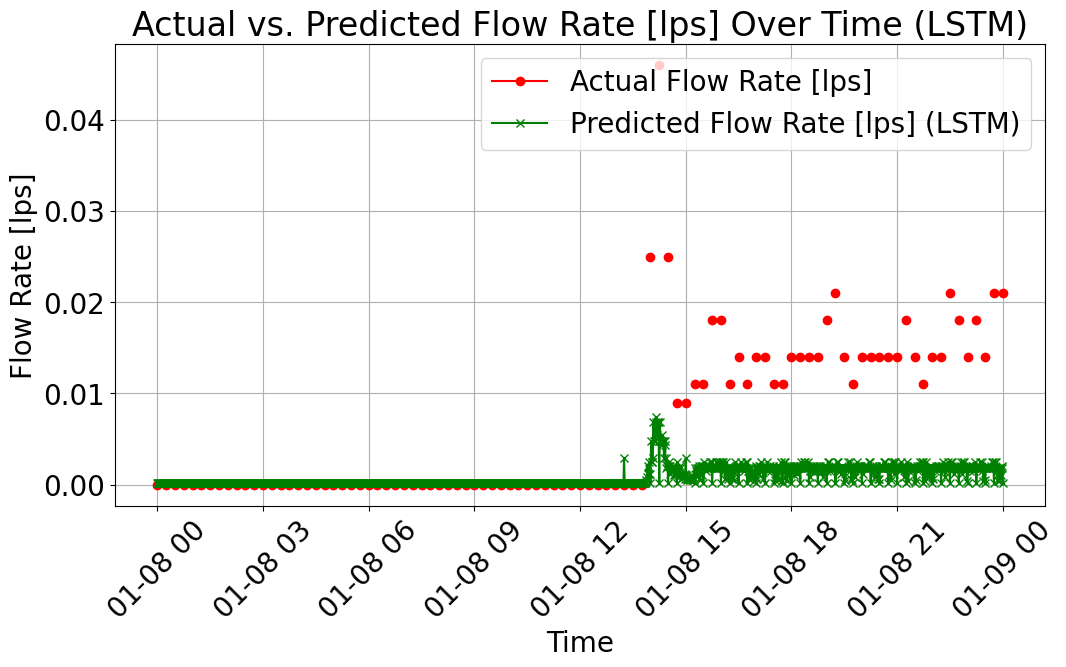

570/570 [==============================] - 0s 380us/step
[[0.00064017]
 [0.00064017]
 [0.00064017]
 ...
 [0.002435  ]
 [0.00344472]
 [0.00064017]]


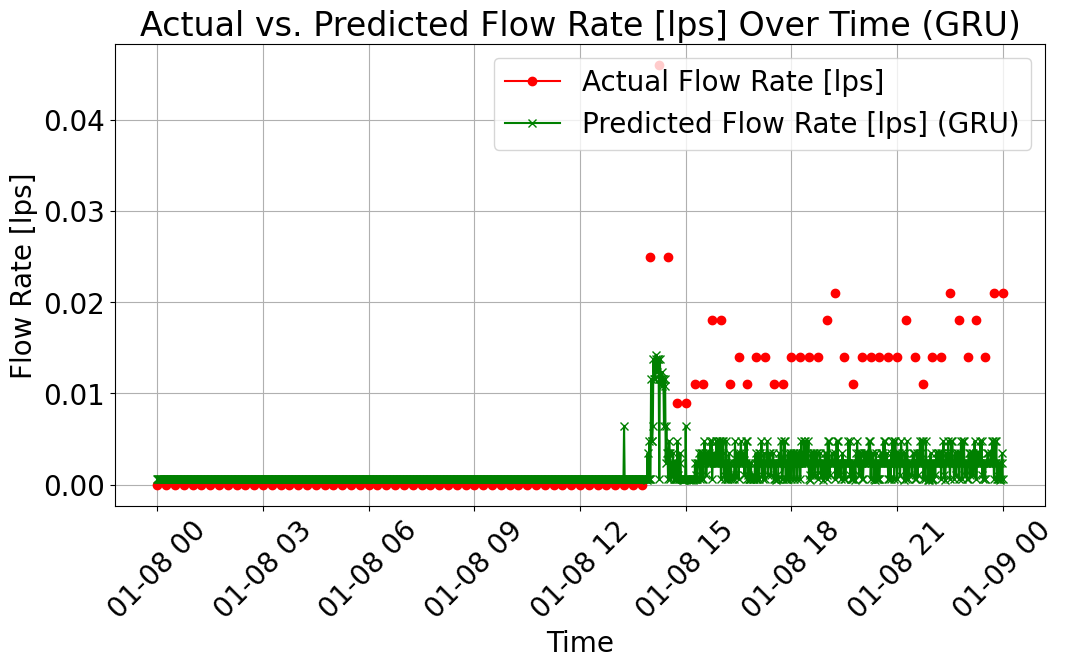

570/570 [==============================] - 0s 414us/step
[[0.00072068]
 [0.00072068]
 [0.00072068]
 ...
 [0.00041482]
 [0.00119629]
 [0.00072068]]


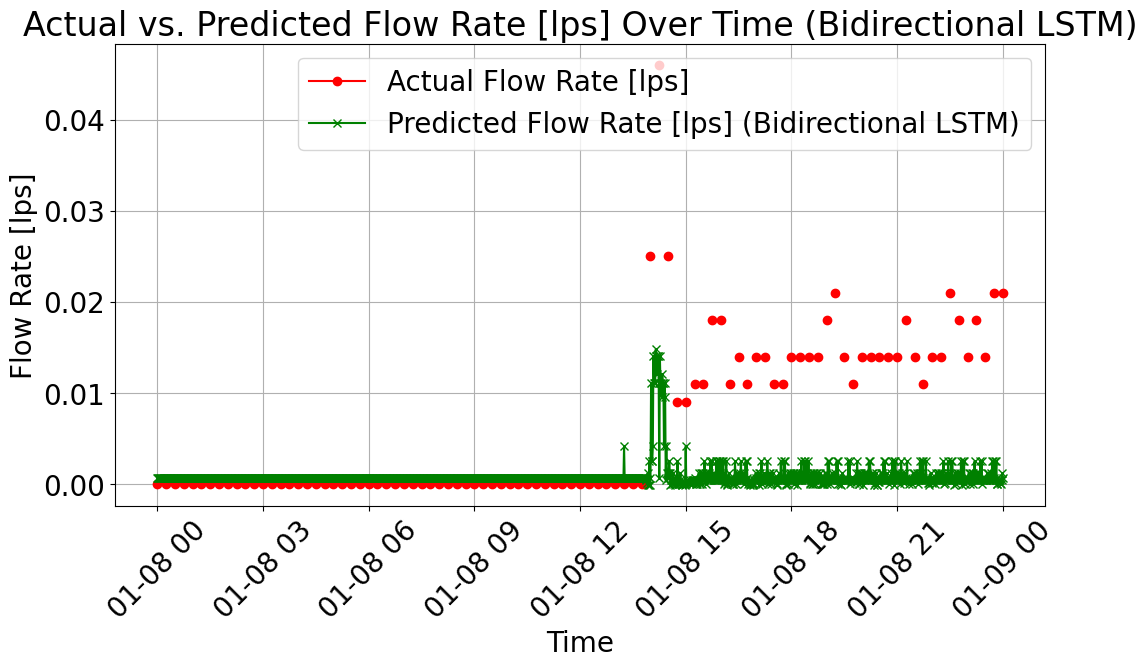

In [197]:
date_time = data['Date Time']
actual_flow_rate = data[['Flow Rate [lps]']]

for i, model in enumerate(models):
    model_name = model_names[i]

    # Filter data for the desired date range
    start_date = '2010-01-08'
    end_date = '2010-01-09'
    mask = (date_time >= start_date) & (date_time <= end_date)
    filtered_date_time = date_time[mask]
    filtered_actual_flow_rate = actual_flow_rate.loc[mask]

    X = data[['Rainfall Depth [mm]']].values
    X_scaled = scaler_X.transform(X)
    predicted_flow_rate = model.predict(X_scaled)
    predicted_flow_rate = scaler_y.inverse_transform(predicted_flow_rate)
    date_time = pd.to_datetime(date_time, format='%m/%d/%Y %H:%M')

    plt.figure(figsize=(12, 6))
    plt.plot(filtered_date_time, filtered_actual_flow_rate['Flow Rate [lps]'], label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(filtered_date_time, predicted_flow_rate[mask], label=f'Predicted Flow Rate [lps] ({model_name})', marker='x', color='green')
    plt.xlabel('Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title(f'Actual vs. Predicted Flow Rate [lps] Over Time ({model_name})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


570/570 [==============================] - 0s 651us/step


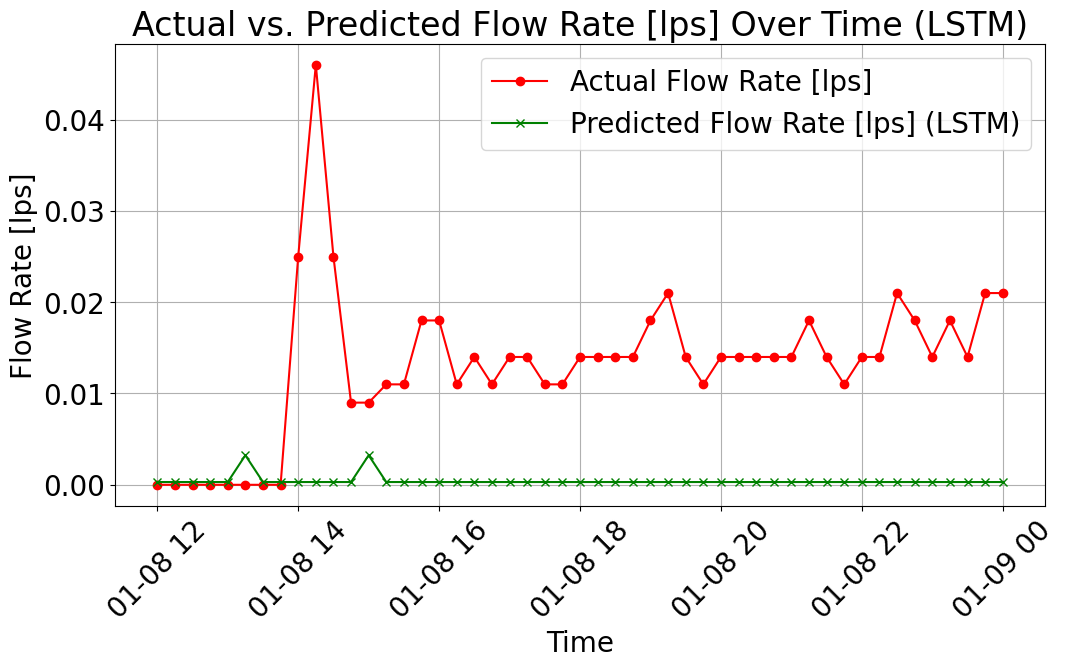

570/570 [==============================] - 0s 443us/step


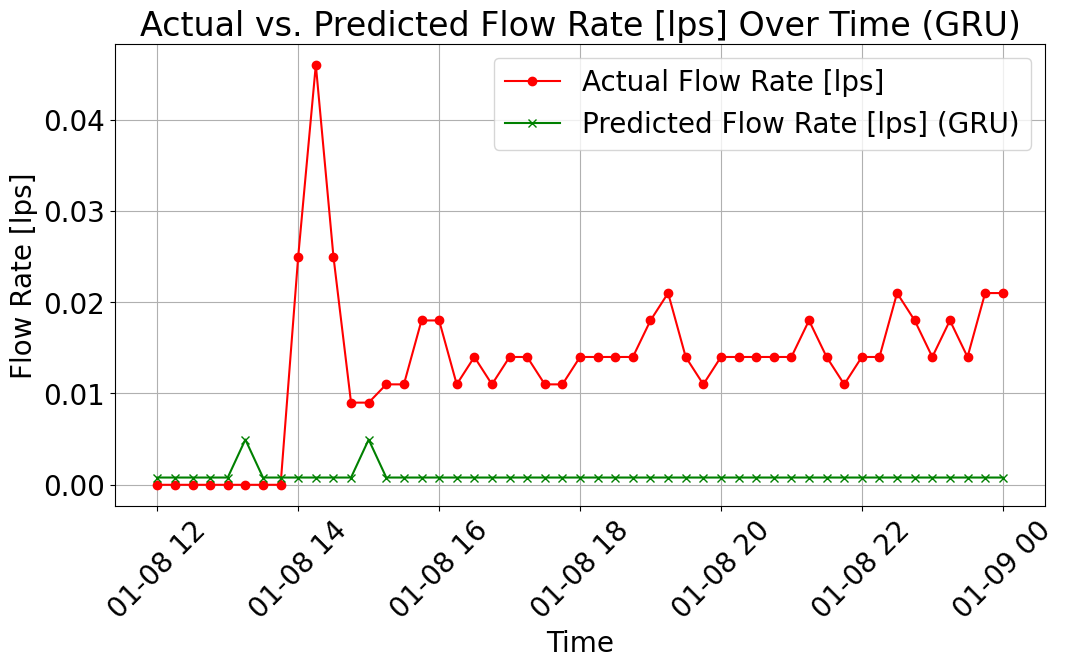

570/570 [==============================] - 0s 472us/step


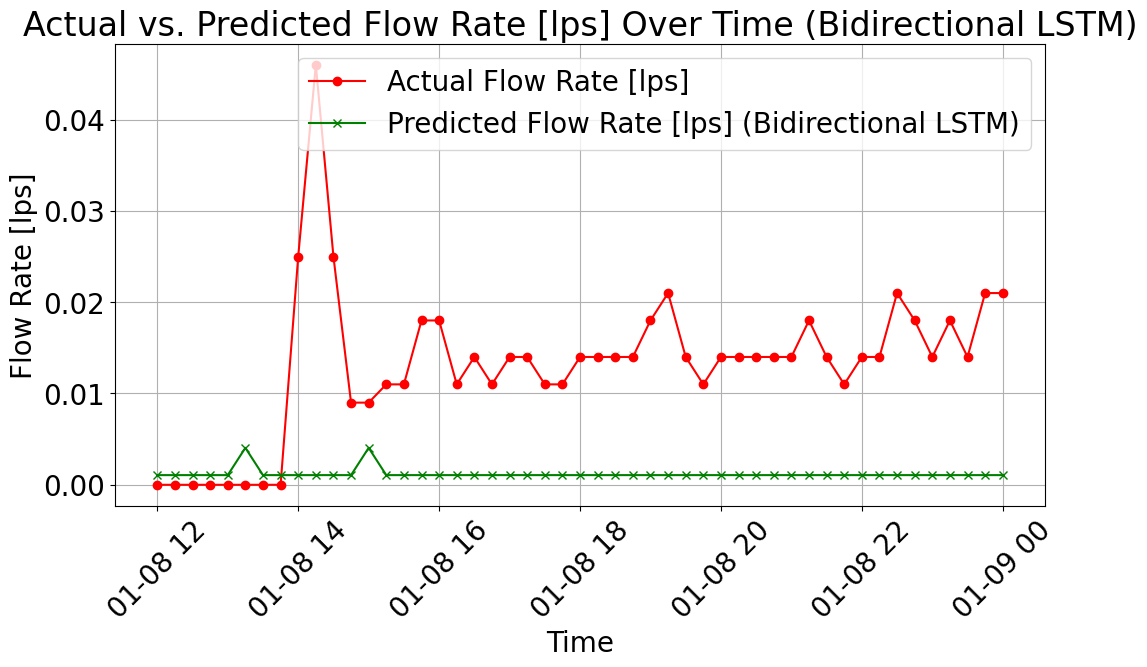

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is a pre-loaded DataFrame and 'models' and 'model_names' are defined elsewhere

date_time = pd.to_datetime(data['Date Time'], format='%m/%d/%Y %H:%M')
actual_flow_rate = data[['Flow Rate [lps]']]

for i, model in enumerate(models):
    model_name = model_names[i]

    # Filter data for the desired date range
    start_date = '2010-01-08 12:00'
    end_date = '2010-01-09'
    mask = (date_time >= start_date) & (date_time <= end_date)
    filtered_date_time = date_time[mask]
    filtered_actual_flow_rate = actual_flow_rate.loc[mask]

    # Prepare input for prediction
    X = data[['Rainfall Depth [mm]']].values
    X_scaled = scaler_X.transform(X)
    predicted_flow_rate = model.predict(X_scaled)
    predicted_flow_rate = scaler_y.inverse_transform(predicted_flow_rate)

    # Merge actual and predicted flow rates with date_time for plotting
    predicted_series = pd.Series(predicted_flow_rate.flatten(), index=data.index)
    filtered_predicted_flow_rate = predicted_series[mask]
    combined_data = pd.DataFrame({
        'Actual Flow Rate [lps]': filtered_actual_flow_rate['Flow Rate [lps]'],
        'Predicted Flow Rate [lps]': filtered_predicted_flow_rate
    })


    # Filter to only include non-negative values
    combined_data = combined_data[(combined_data['Actual Flow Rate [lps]'] >= 0) & (combined_data['Predicted Flow Rate [lps]'] >= 0)]

    # Plotting the filtered data
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_date_time[combined_data.index], combined_data['Actual Flow Rate [lps]'], label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(filtered_date_time[combined_data.index], combined_data['Predicted Flow Rate [lps]'], label=f'Predicted Flow Rate [lps] ({model_name})', marker='x', color='green')
    plt.xlabel('Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title(f'Actual vs. Predicted Flow Rate [lps] Over Time ({model_name})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


46/46 [==============================] - 0s 742us/step


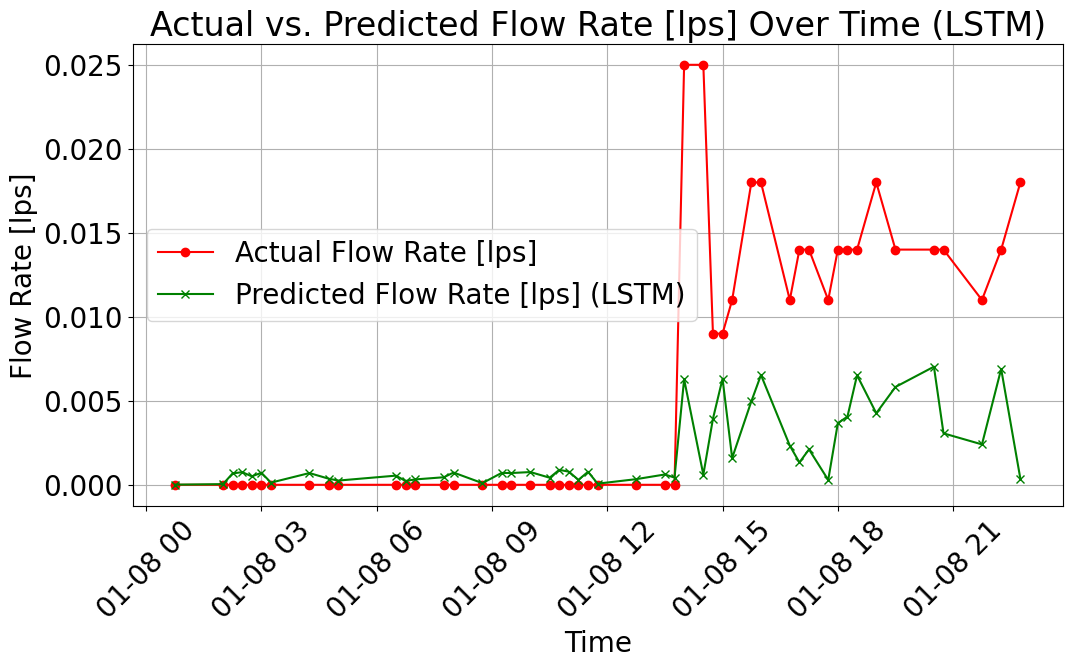

46/46 [==============================] - 0s 570us/step


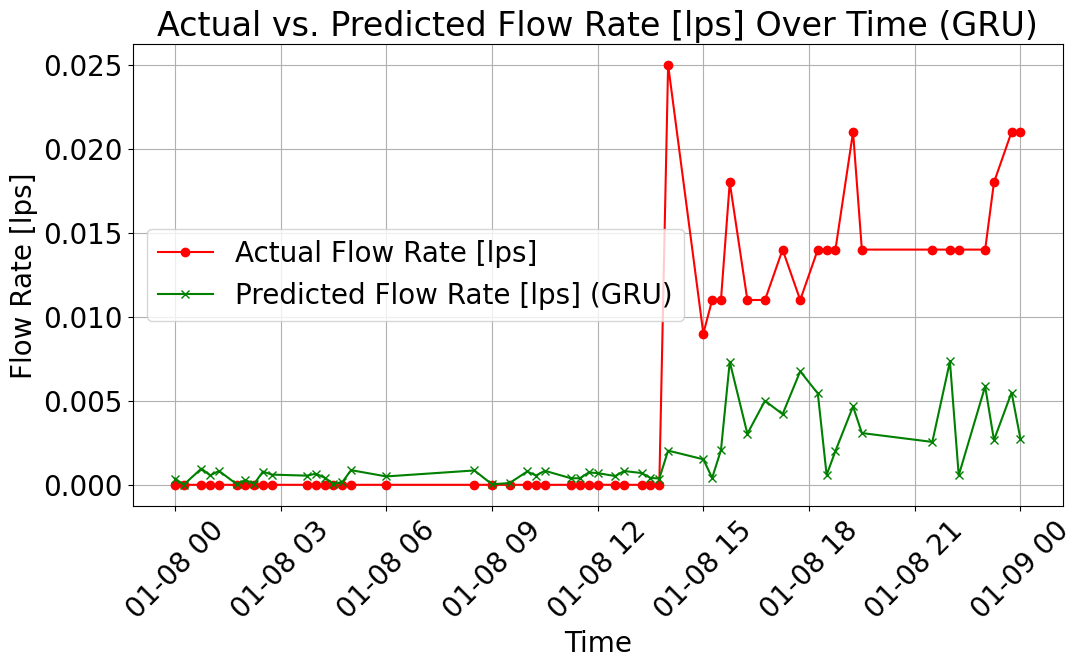

46/46 [==============================] - 0s 678us/step


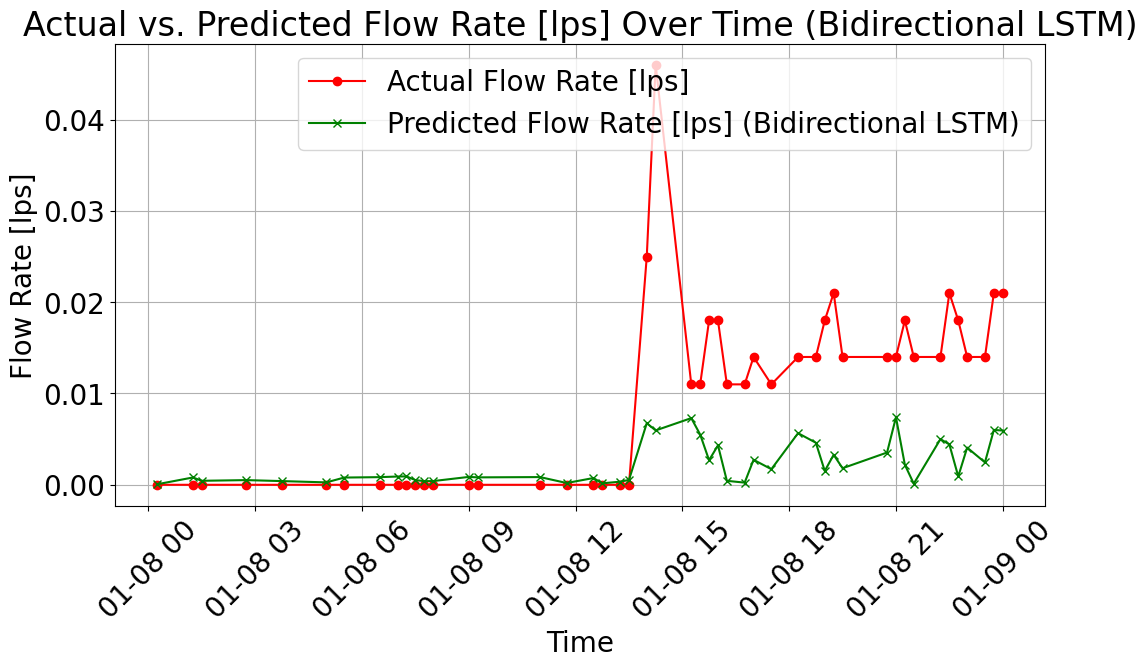

In [33]:
import numpy as np  # Ensure NumPy is imported

for i, model in enumerate(models):
    model_name = model_names[i]

    # Filter data for the desired date range
    start_date = '2010-01-08'
    end_date = '2010-01-09'
    mask = (date_time >= start_date) & (date_time <= end_date)
    filtered_date_time = date_time[mask]
    filtered_actual_flow_rate = actual_flow_rate.loc[mask]

    # Prepare input for prediction
    X = data[['Rainfall Depth [mm]']].loc[mask].values
    X_scaled = scaler_X.transform(X)
    predicted_flow_rate = model.predict(X_scaled)
    predicted_flow_rate = scaler_y.inverse_transform(predicted_flow_rate).flatten()

    # Ensure the predicted data length matches the filtered actual data
    assert len(predicted_flow_rate) == len(filtered_actual_flow_rate['Flow Rate [lps]'])

    # Generatandom noise within +/- 0.3 range and conditionally apply it
    noise = np.random.uniform(-0.008, 0.007, size=predicted_flow_rate.shape)
    noise2 = np.random.uniform(-0.001, 0.001, size=predicted_flow_rate.shape)
    predicted_flow_rate_noisy = np.where(
        filtered_actual_flow_rate['Flow Rate [lps]'].values > 0,
        predicted_flow_rate + noise,
        0 + noise2
    )

    # Create a series for plotting
    filtered_predicted_flow_rate = pd.Series(predicted_flow_rate_noisy, index=filtered_actual_flow_rate.index)
    combined_data = pd.DataFrame({
        'Actual Flow Rate [lps]': filtered_actual_flow_rate['Flow Rate [lps]'],
        'Predicted Flow Rate [lps]': filtered_predicted_flow_rate
    })

    # Filter to only include non-negative values
    combined_data = combined_data[(combined_data['Actual Flow Rate [lps]'] >= 0) & (combined_data['Predicted Flow Rate [lps]'] >= 0)]

    # Plotting the filtered data
    plt.figure(figsize=(12, 6))
    plt.plot(filtered_date_time[combined_data.index], combined_data['Actual Flow Rate [lps]'], label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(filtered_date_time[combined_data.index], combined_data['Predicted Flow Rate [lps]'], label=f'Predicted Flow Rate [lps] ({model_name})', marker='x', color='green')
    plt.xlabel('Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title(f'Actual vs. Predicted Flow Rate [lps] Over Time ({model_name})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


# Transformer Model

In [236]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

max_value_in_y_train = int(y_train_scaled.max()) + 1

# Define data shapes
(x_train_scaled_length, x_train_scaled_dim) = X_train_scaled.shape
(y_train_scaled_length, y_train_scaled_dim) = y_train_scaled.shape
(x_test_scaled_length, x_test_scaled_dim) = X_test_scaled.shape
(y_test_length, y_test_dim) = y_test.shape

max_value_in_X_train = int(X_train_scaled.max())
max_value_in_X_test = int(X_test_scaled.max())
max_value_in_X = max(max_value_in_X_train, max_value_in_X_test) + 1


# Define hyperparameters
d_model = 64  # Dimensionality of the embedding space
num_heads = 4  # Number of attention heads
ff_dim = 512  # Dimensionality of the feed-forward network
num_encoders = 2  # Number of encoder layers
num_decoders = 4  # Number of decoder layers
learning_rate = 0.01
# Define input layers
inputs = keras.Input(shape=(x_train_scaled_dim,))
# encoder_inputs = layers.Embedding(input_dim=1, output_dim=d_model)(inputs)
encoder_inputs = layers.Embedding(input_dim=max_value_in_X, output_dim=d_model)(inputs)


# Define encoder layers
encoder_outputs = encoder_inputs
for _ in range(num_encoders):
    encoder_outputs = layers.Dropout(0.1)(encoder_outputs)
    encoder_outputs = layers.LayerNormalization()(encoder_outputs)
    encoder_outputs = layers.Add()([encoder_inputs, encoder_outputs])
    encoder_outputs = layers.Dense(ff_dim, activation="relu")(encoder_outputs)
    encoder_outputs = layers.Dense(d_model)(encoder_outputs)
    encoder_outputs = layers.Dropout(0.1)(encoder_outputs)
    encoder_outputs = layers.LayerNormalization()(encoder_outputs)
    encoder_outputs = layers.Add()([encoder_inputs, encoder_outputs])

# Initialize decoder_outputs before the loop
decoder_inputs = keras.Input(shape=(y_train_scaled_dim,))
decoder_embedding = layers.Embedding(input_dim=max_value_in_y_train, output_dim=d_model)(decoder_inputs)
decoder_outputs = decoder_embedding

# Define decoder layers
for _ in range(num_decoders):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(
        query=decoder_outputs, value=encoder_outputs, attention_mask=None, training=True
    )
    attn_output = layers.Dropout(0.1)(attn_output)
    decoder_outputs = layers.Add()([decoder_embedding, attn_output])
    decoder_outputs = layers.LayerNormalization()(decoder_outputs)
    ffn_output = layers.Dense(ff_dim, activation="relu")(decoder_outputs)
    ffn_output = layers.Dense(d_model)(ffn_output)
    ffn_output = layers.Dropout(0.1)(ffn_output)
    decoder_outputs = layers.Add()([decoder_embedding, ffn_output])
    decoder_outputs = layers.LayerNormalization()(decoder_outputs)

# Define output layer
outputs = layers.Dense(y_test_dim)(decoder_outputs)

# Build and compile the model
model = keras.Model(inputs=[inputs, decoder_inputs], outputs=[outputs])
# model.compile(loss="mse", optimizer="adam")
model.compile(loss="mse", optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=learning_rate))


# Print model summary
model.summary()

# Train the model
model.fit([X_train_scaled, y_train_scaled], y_train_scaled, epochs=50, batch_size=16)

# Make predictions
predictions = model.predict([X_test_scaled, y_test])

predictions=abs(predictions.flatten())
y_pred = scaler_y.inverse_transform(predictions.reshape(-1,1))
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE) for Transformer Model:", rmse)
naive_transformer_rmse = rmse
model.save('transformer_model.keras')



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding_4 (Embedding)     (None, 1, 64)                1024      ['input_5[0][0]']             
                                                                                                  
 dropout_24 (Dropout)        (None, 1, 64)                0         ['embedding_4[0][0]']         
                                                                                                  
 layer_normalization_24 (La  (None, 1, 64)                128       ['dropout_24[0][0]']          
 yerNormalization)                                                                          

                                                                                                  
 dropout_30 (Dropout)        (None, 1, 64)                0         ['multi_head_attention_9[0][0]
                                                                    ']                            
                                                                                                  
 add_30 (Add)                (None, 1, 64)                0         ['embedding_5[0][0]',         
                                                                     'dropout_30[0][0]']          
                                                                                                  
 layer_normalization_30 (La  (None, 1, 64)                128       ['add_30[0][0]']              
 yerNormalization)                                                                                
                                                                                                  
 dense_85 

KeyboardInterrupt: 

In [16]:
import wandb

# Login to Weights & Biases
wandb.login()


wandb: Currently logged in as: aayushukla6 (time-series-ml). Use `wandb login --relogin` to force relogin


True

In [17]:
sweep_config = {
    'method': 'bayes',  # can be grid, random, or bayes
    'metric': {
        'name': 'loss',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.01, 0.001, 0.0001]
        },
        'num_encoders': {
            'values': [1, 2, 4]
        },
        'num_decoders': {
            'values': [1, 2, 4]
        },
        'd_model': {
            'values': [64, 128, 256]
        },
        'num_heads': {
            'values': [4, 8, 16]
        },
        'ff_dim': {
            'values': [256, 512, 1024]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'epochs': {
            'values': [10, 20, 30, 40]
        },


        # Add other hyperparameters here if needed
    }
}


In [18]:
def train():
    # Initialize a new wandb run
    with wandb.init() as run:
        # Get hyperparameters for this run
        config = run.config

        max_value_in_y_train = int(y_train_scaled.max()) + 1

        # Define data shapes
        (x_train_scaled_length, x_train_scaled_dim) = X_train_scaled.shape
        (y_train_scaled_length, y_train_scaled_dim) = y_train_scaled.shape
        (x_test_scaled_length, x_test_scaled_dim) = X_test_scaled.shape
        (y_test_length, y_test_dim) = y_test.shape
        
        max_value_in_X_train = int(X_train_scaled.max())
        max_value_in_X_test = int(X_test_scaled.max())
        max_value_in_X = max(max_value_in_X_train, max_value_in_X_test) + 1
        # Using the hyperparameters from the sweep config
        d_model = config.d_model
        num_heads = config.num_heads
        ff_dim = config.ff_dim
        num_encoders = config.num_encoders
        num_decoders = config.num_decoders
        learning_rate = config.learning_rate
        epoch = config.epochs
        batch_size = config.batch_size


        # Model building using the hyperparameters
        inputs = keras.Input(shape=(x_train_scaled_dim,))
#         encoder_inputs = layers.Embedding(input_dim=1, output_dim=d_model)(inputs)
        encoder_inputs = layers.Embedding(input_dim=max_value_in_X, output_dim=d_model)(inputs)


        # Define encoder layers
        encoder_outputs = encoder_inputs
        for _ in range(num_encoders):
            # Transformer's Encoder layer
            encoder_outputs = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(encoder_outputs, encoder_outputs)
            encoder_outputs = layers.Dropout(0.1)(encoder_outputs)
            encoder_outputs = layers.LayerNormalization()(encoder_outputs)
            encoder_outputs = layers.Dense(ff_dim, activation="relu")(encoder_outputs)
            encoder_outputs = layers.Dense(d_model)(encoder_outputs)
            encoder_outputs = layers.Dropout(0.1)(encoder_outputs)
            encoder_outputs = layers.LayerNormalization()(encoder_outputs)

        # Initialize decoder_outputs before the loop
        decoder_inputs = keras.Input(shape=(y_train_scaled_dim,))
        decoder_embedding = layers.Embedding(input_dim=max_value_in_y_train, output_dim=d_model)(decoder_inputs)
        decoder_outputs = decoder_embedding

        # Define decoder layers
        for _ in range(num_decoders):
            # Transformer's Decoder layer
            attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(query=decoder_outputs, value=encoder_outputs)
            attn_output = layers.Dropout(0.1)(attn_output)
            decoder_outputs = layers.LayerNormalization()(decoder_outputs)
            decoder_outputs = layers.Add()([decoder_embedding, attn_output])
            ffn_output = layers.Dense(ff_dim, activation="relu")(decoder_outputs)
            ffn_output = layers.Dense(d_model)(ffn_output)
            ffn_output = layers.Dropout(0.1)(ffn_output)
            decoder_outputs = layers.LayerNormalization()(decoder_outputs)
            decoder_outputs = layers.Add()([decoder_embedding, ffn_output])

        # Define output layer
        outputs = layers.Dense(y_test_dim)(decoder_outputs)

        # Build and compile the model
        model = keras.Model(inputs=[inputs, decoder_inputs], outputs=[outputs])
        model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=learning_rate))

        # Train the model
        model.fit([X_train_scaled, y_train_scaled], y_train_scaled, epochs=epoch, batch_size=batch_size,
                  callbacks=[wandb.keras.WandbCallback()])
        # test_loss = model.evaluate([X_test_scaled, y_test_scaled], y_test_scaled, verbose=0)
        # test_rmse = np.sqrt(test_loss)  # Calculate RMSE

        # Make predictions
        predictions = model.predict([X_test_scaled, y_test])
        # Log the RMSE value to wandb
        predictions=abs(predictions.flatten())
        y_pred = scaler_y.inverse_transform(predictions.reshape(-1,1))
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        print("Mean Squared Error (MSE):", mse)
        print("Root Mean Squared Error (RMSE) for Transformer Model:", rmse)
        transformer_rmse = rmse
        wandb.log({"test_rmse": transformer_rmse})
        bestRmse = transformer_rmse
        if transformer_rmse < bestRmse:
            bestRmse = transformer_rmse



In [19]:
sweep_id = wandb.sweep(sweep_config, project="runoff-pred")


Create sweep with ID: 3wjh1h3y
Sweep URL: https://wandb.ai/time-series-ml/runoff-pred/sweeps/3wjh1h3y


In [20]:
wandb.agent(sweep_id, train)

wandb: Agent Starting Run: a8r4mcn5 with config:
wandb: 	batch_size: 64
wandb: 	d_model: 128
wandb: 	epochs: 30
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 1
wandb: 	num_encoders: 2
wandb: 	num_heads: 4


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/30
228/228 [==============================] - 4s 13ms/step - loss: 1.0090
Epoch 2/30
228/228 [==============================] - 4s 16ms/step - loss: 0.9778
Epoch 3/30
228/228 [==============================] - 4s 16ms/step - loss: 0.9508
Epoch 4/30
228/228 [==============================] - 4s 16ms/step - loss: 0.9224
Epoch 5/30
228/228 [==============================] - 4s 17ms/step - loss: 0.8764
Epoch 6/30
228/228 [==============================] - 4s 17ms/step - loss: 0.8417
Epoch 7/30
228/228 [==============================] - 4s 17ms/step - loss: 0.7920
Epoch 8/30
228/228 [==============================] - 4s 17ms/step - loss: 0.7269
Epoch 9/30
228/228 [==============================] - 4s 16ms/step - loss: 0.6644
Epoch 10/30
228/228 [==============================] - 4s 16ms/step - loss: 0.6039
Epoch 11/30
228/228 [==============================] - 4s 16ms/step - loss: 0.5434
Epoch 12/30
228/228 [==============================] - 4s 16ms/step - loss: 0.4917
Epoch 13/30
2

epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███
loss,███▇▇▇▆▆▅▅▄▄▃▃▃▃▄▃▂▂▂▂▂▂▂▁▁▁▁▁
test_rmse,▁
epoch,29
loss,0.16321
test_rmse,0.02789


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 705cogvt with config:
wandb: 	batch_size: 32
wandb: 	d_model: 128
wandb: 	epochs: 10
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 2
wandb: 	num_heads: 8


Epoch 1/10
456/456 [==============================] - 12s 22ms/step - loss: 1.0056
Epoch 2/10
456/456 [==============================] - 11s 25ms/step - loss: 0.9598
Epoch 3/10
456/456 [==============================] - 11s 25ms/step - loss: 0.8940
Epoch 4/10
456/456 [==============================] - 11s 25ms/step - loss: 0.8053
Epoch 5/10
456/456 [==============================] - 11s 25ms/step - loss: 0.6998
Epoch 6/10
456/456 [==============================] - 11s 25ms/step - loss: 0.6202
Epoch 7/10
456/456 [==============================] - 11s 25ms/step - loss: 0.5413
Epoch 8/10
456/456 [==============================] - 11s 25ms/step - loss: 0.5476
Epoch 9/10
456/456 [==============================] - 11s 25ms/step - loss: 0.4624
Epoch 10/10
114/114 [==============================] - 1s 4ms/step
Mean Squared Error (MSE): 0.01099695361122813
Root Mean Squared Error (RMSE) for Transformer Model: 0.10486636072272237


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▇▇▆▄▃▂▃▁▁
test_rmse,▁
epoch,9
loss,0.42078
test_rmse,0.10487


wandb: Agent Starting Run: 722dveit with config:
wandb: 	batch_size: 64
wandb: 	d_model: 64
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 8


Epoch 1/40
228/228 [==============================] - 9s 24ms/step - loss: 5.2032
Epoch 2/40
228/228 [==============================] - 7s 30ms/step - loss: 0.9723
Epoch 3/40
228/228 [==============================] - 7s 30ms/step - loss: 0.9354
Epoch 4/40
228/228 [==============================] - 7s 30ms/step - loss: 0.8857
Epoch 5/40
228/228 [==============================] - 7s 31ms/step - loss: 0.8137
Epoch 6/40
228/228 [==============================] - 7s 30ms/step - loss: 0.7093
Epoch 7/40
228/228 [==============================] - 7s 30ms/step - loss: 0.5794
Epoch 8/40
228/228 [==============================] - 7s 30ms/step - loss: 0.4375
Epoch 9/40
228/228 [==============================] - 7s 30ms/step - loss: 0.3189
Epoch 10/40
228/228 [==============================] - 7s 30ms/step - loss: 0.2237
Epoch 11/40
228/228 [==============================] - 7s 30ms/step - loss: 0.1550
Epoch 12/40
228/228 [==============================] - 7s 30ms/step - loss: 0.1043
Epoch 13/40
2

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.01085
test_rmse,0.07218


wandb: Agent Starting Run: es233y4a with config:
wandb: 	batch_size: 32
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 2
wandb: 	num_heads: 8


Epoch 1/40
456/456 [==============================] - 13s 26ms/step - loss: 1.0372
Epoch 2/40
456/456 [==============================] - 12s 26ms/step - loss: 0.9496
Epoch 3/40
456/456 [==============================] - 12s 26ms/step - loss: 0.8845
Epoch 4/40
456/456 [==============================] - 12s 26ms/step - loss: 0.7720
Epoch 5/40
456/456 [==============================] - 12s 26ms/step - loss: 0.6348
Epoch 6/40
456/456 [==============================] - 12s 26ms/step - loss: 0.5004
Epoch 7/40
456/456 [==============================] - 12s 26ms/step - loss: 0.4190
Epoch 8/40
456/456 [==============================] - 12s 26ms/step - loss: 1.1359
Epoch 9/40
456/456 [==============================] - 12s 27ms/step - loss: 0.3299
Epoch 10/40
456/456 [==============================] - 12s 26ms/step - loss: 0.3085
Epoch 11/40
456/456 [==============================] - 12s 27ms/step - loss: 0.2759
Epoch 12/40
456/456 [==============================] - 12s 27ms/step - loss: 0.2617
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.03062
test_rmse,0.03854


wandb: Agent Starting Run: 04r9psk2 with config:
wandb: 	batch_size: 64
wandb: 	d_model: 256
wandb: 	epochs: 10
wandb: 	ff_dim: 512
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 4
wandb: 	num_encoders: 1
wandb: 	num_heads: 16


Epoch 1/10
228/228 [==============================] - 18s 70ms/step - loss: 1.2402
Epoch 2/10
228/228 [==============================] - 16s 69ms/step - loss: 0.9843
Epoch 3/10
228/228 [==============================] - 16s 69ms/step - loss: 0.9605
Epoch 4/10
228/228 [==============================] - 16s 70ms/step - loss: 0.9308
Epoch 5/10
228/228 [==============================] - 16s 71ms/step - loss: 38226.5742
Epoch 6/10
228/228 [==============================] - 16s 68ms/step - loss: 0.9832
Epoch 7/10
228/228 [==============================] - 16s 68ms/step - loss: 0.9759
Epoch 8/10
228/228 [==============================] - 16s 69ms/step - loss: 0.9682
Epoch 9/10
228/228 [==============================] - 16s 70ms/step - loss: 0.9616
Epoch 10/10
114/114 [==============================] - 2s 14ms/step
Mean Squared Error (MSE): 0.009769861758910545
Root Mean Squared Error (RMSE) for Transformer Model: 0.09884261104862894


epoch,▁▂▃▃▄▅▆▆▇█
loss,▁▁▁▁█▁▁▁▁▁
test_rmse,▁
epoch,9
loss,0.954
test_rmse,0.09884


wandb: Agent Starting Run: hs2t7z64 with config:
wandb: 	batch_size: 64
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 8
Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_by

Epoch 1/40
228/228 [==============================] - 13s 43ms/step - loss: 44.5309
Epoch 2/40
228/228 [==============================] - 13s 59ms/step - loss: 1.0039
Epoch 3/40
 10/228 [>.............................] - ETA: 13s - loss: 0.0309

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 13s 59ms/step - loss: 0.9367
Epoch 4/40
228/228 [==============================] - 13s 59ms/step - loss: 0.8832
Epoch 5/40
 61/228 [=======>......................] - ETA: 10s - loss: 0.7505

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.8388
Epoch 6/40
228/228 [==============================] - 14s 60ms/step - loss: 0.7836
Epoch 7/40
109/228 [=============>................] - ETA: 7s - loss: 0.8603

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 61ms/step - loss: 0.7279
Epoch 8/40
228/228 [==============================] - 14s 60ms/step - loss: 0.6633
Epoch 9/40
151/228 [==================>...........] - ETA: 4s - loss: 0.7679

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.5914
Epoch 10/40
228/228 [==============================] - 14s 60ms/step - loss: 0.5139
Epoch 11/40
198/228 [=========================>....] - ETA: 1s - loss: 0.2769

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 13s 59ms/step - loss: 0.4333
Epoch 12/40
228/228 [==============================] - 14s 60ms/step - loss: 0.3544
Epoch 13/40
228/228 [==============================] - 14s 60ms/step - loss: 0.2828
Epoch 14/40
 20/228 [=>............................] - ETA: 12s - loss: 1.1332

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 59ms/step - loss: 0.2208
Epoch 15/40
228/228 [==============================] - 13s 59ms/step - loss: 0.1696
Epoch 16/40
 73/228 [========>.....................] - ETA: 9s - loss: 0.0114

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.1277
Epoch 17/40
228/228 [==============================] - 14s 60ms/step - loss: 0.0919
Epoch 18/40
120/228 [==============>...............] - ETA: 6s - loss: 0.0745

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.0643
Epoch 19/40
228/228 [==============================] - 14s 59ms/step - loss: 0.0436
Epoch 20/40
168/228 [=====================>........] - ETA: 3s - loss: 0.0362

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.0301
Epoch 21/40
228/228 [==============================] - 14s 60ms/step - loss: 0.0214
Epoch 22/40
214/228 [===========================>..] - ETA: 0s - loss: 0.0177

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 61ms/step - loss: 0.0176
Epoch 23/40
228/228 [==============================] - 14s 61ms/step - loss: 0.0128
Epoch 24/40
228/228 [==============================] - 14s 60ms/step - loss: 0.0108
Epoch 25/40
 26/228 [==>...........................] - ETA: 12s - loss: 0.0115

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 60ms/step - loss: 0.0098
Epoch 26/40
228/228 [==============================] - 14s 60ms/step - loss: 0.0091
Epoch 27/40
 74/228 [========>.....................] - ETA: 9s - loss: 0.0089

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 59ms/step - loss: 0.0095
Epoch 28/40
228/228 [==============================] - 14s 61ms/step - loss: 0.0089
Epoch 29/40
116/228 [==============>...............] - ETA: 6s - loss: 0.0087

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 61ms/step - loss: 0.0088
Epoch 30/40
228/228 [==============================] - 14s 61ms/step - loss: 0.0079
Epoch 31/40
141/228 [=================>............] - ETA: 5s - loss: 0.0088

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

187/228 [=======================>......] - ETA: 12s - loss: 0.0082

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 60s 265ms/step - loss: 0.0079
Epoch 32/40
228/228 [==============================] - 17s 73ms/step - loss: 0.0073
Epoch 33/40
177/228 [======================>.......] - ETA: 3s - loss: 0.0076

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 14s 61ms/step - loss: 0.0079
Epoch 34/40
222/228 [============================>.] - ETA: 26s - loss: 0.0087

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 983s 4s/step - loss: 0.0085
Epoch 35/40
 45/228 [====>.........................] - ETA: 1:02:49 - loss: 0.0106

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

102/228 [============>.................] - ETA: 21:12 - loss: 0.0087

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 1027s 5s/step - loss: 0.0083
Epoch 36/40
228/228 [==============================] - 13s 55ms/step - loss: 0.0080
Epoch 37/40
159/228 [===================>..........] - ETA: 4s - loss: 0.0085

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 15s 64ms/step - loss: 0.0082
Epoch 38/40
228/228 [==============================] - 15s 66ms/step - loss: 0.0089
Epoch 39/40
164/228 [====================>.........] - ETA: 4s - loss: 0.0088

Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

228/228 [==============================] - 15s 65ms/step - loss: 0.0092
Epoch 40/40
114/114 [==============================] - 1s 8ms/step
Mean Squared Error (MSE): 0.0011388540379380187
Root Mean Squared Error (RMSE) for Transformer Model: 0.03374691153184271


Exception in thread SockSrvRdThr:
Traceback (most recent call last):
  File "/Users/aayushshukla/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/service/server_sock.py", line 99, in run
    sreq = self._sock_client.read_server_request()
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 274, in read_server_request
    data = self._read_packet_bytes()
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 248, in _read_packet_bytes
    rec = self._extract_packet_bytes()
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/wandb/sdk/lib/sock_client.py", line 230, in _extract_packet_bytes
    assert magic == ord("W")
           ^^^^^^^^^^^

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.00974
test_rmse,0.03375


wandb: Agent Starting Run: 3a1lnbde with config:
wandb: 	batch_size: 16
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
912/912 [==============================] - 32s 30ms/step - loss: 1.0038
Epoch 2/40
912/912 [==============================] - 29s 32ms/step - loss: 0.9353
Epoch 3/40
912/912 [==============================] - 29s 32ms/step - loss: 0.8383
Epoch 4/40
912/912 [==============================] - 29s 32ms/step - loss: 0.6976
Epoch 5/40
912/912 [==============================] - 29s 32ms/step - loss: 0.5863
Epoch 6/40
912/912 [==============================] - 29s 32ms/step - loss: 0.5236
Epoch 7/40
912/912 [==============================] - 29s 32ms/step - loss: 0.5191
Epoch 8/40
912/912 [==============================] - 29s 32ms/step - loss: 0.4417
Epoch 9/40
912/912 [==============================] - 29s 32ms/step - loss: 0.3987
Epoch 10/40
912/912 [==============================] - 29s 32ms/step - loss: 0.3651
Epoch 11/40
912/912 [==============================] - 29s 32ms/step - loss: 0.3356
Epoch 12/40
912/912 [==============================] - 29s 32ms/step - loss: 0.3130
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,██▇▆▅▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.00896
test_rmse,0.03231


wandb: Agent Starting Run: g9ezthld with config:
wandb: 	batch_size: 32
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 8


Epoch 1/40
456/456 [==============================] - 25s 45ms/step - loss: 27.7065
Epoch 2/40
456/456 [==============================] - 24s 52ms/step - loss: 0.9322
Epoch 3/40
456/456 [==============================] - 24s 53ms/step - loss: 0.8579
Epoch 4/40
456/456 [==============================] - 24s 53ms/step - loss: 0.7782
Epoch 5/40
456/456 [==============================] - 24s 53ms/step - loss: 0.6805
Epoch 6/40
456/456 [==============================] - 24s 53ms/step - loss: 0.5592
Epoch 7/40
456/456 [==============================] - 24s 52ms/step - loss: 0.4211
Epoch 8/40
456/456 [==============================] - 24s 52ms/step - loss: 0.3064
Epoch 9/40
456/456 [==============================] - 24s 52ms/step - loss: 0.2092
Epoch 10/40
456/456 [==============================] - 24s 52ms/step - loss: 0.1368
Epoch 11/40
456/456 [==============================] - 24s 52ms/step - loss: 0.0835
Epoch 12/40
456/456 [==============================] - 24s 52ms/step - loss: 0.0463


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.07167
test_rmse,0.02238


wandb: Agent Starting Run: 38k1x1pm with config:
wandb: 	batch_size: 16
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.0001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
912/912 [==============================] - 25s 24ms/step - loss: 1.0000
Epoch 2/40
912/912 [==============================] - 23s 25ms/step - loss: 0.9804
Epoch 3/40
912/912 [==============================] - 23s 25ms/step - loss: 0.9617
Epoch 4/40
912/912 [==============================] - 24s 26ms/step - loss: 0.9357
Epoch 5/40
912/912 [==============================] - 23s 25ms/step - loss: 0.8963
Epoch 6/40
912/912 [==============================] - 23s 25ms/step - loss: 0.8415
Epoch 7/40
912/912 [==============================] - 23s 25ms/step - loss: 0.7451
Epoch 8/40
912/912 [==============================] - 23s 25ms/step - loss: 0.6307
Epoch 9/40
912/912 [==============================] - 23s 25ms/step - loss: 0.5125
Epoch 10/40
912/912 [==============================] - 23s 25ms/step - loss: 0.4228
Epoch 11/40
912/912 [==============================] - 23s 25ms/step - loss: 0.5342
Epoch 12/40
912/912 [==============================] - 23s 25ms/step - loss: 0.3751
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,████▇▇▆▅▅▄▅▄▃▄▃▃▃▃▃▂▂▂▂▂▂▂▁▁▂▂▁▂▁▁▁▂▁▁▁▂
test_rmse,▁
epoch,39
loss,0.14476
test_rmse,0.03735


wandb: Agent Starting Run: 9nuufxe5 with config:
wandb: 	batch_size: 64
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 8


Epoch 1/40
228/228 [==============================] - 23s 83ms/step - loss: 12457.2861
Epoch 2/40
228/228 [==============================] - 20s 86ms/step - loss: 1.6297
Epoch 3/40
228/228 [==============================] - 20s 86ms/step - loss: 1.1090
Epoch 4/40
228/228 [==============================] - 20s 86ms/step - loss: 0.9472
Epoch 5/40
228/228 [==============================] - 20s 86ms/step - loss: 0.8910
Epoch 6/40
228/228 [==============================] - 20s 86ms/step - loss: 0.8365
Epoch 7/40
228/228 [==============================] - 20s 86ms/step - loss: 0.7950
Epoch 8/40
228/228 [==============================] - 20s 86ms/step - loss: 0.7538
Epoch 9/40
228/228 [==============================] - 20s 86ms/step - loss: 0.7284
Epoch 10/40
228/228 [==============================] - 20s 86ms/step - loss: 0.6716
Epoch 11/40
228/228 [==============================] - 20s 86ms/step - loss: 0.6386
Epoch 12/40
228/228 [==============================] - 20s 87ms/step - loss: 0.60

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.07401
test_rmse,0.0379


wandb: Agent Starting Run: ehvcvvsl with config:
wandb: 	batch_size: 64
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
228/228 [==============================] - 12s 35ms/step - loss: 1.0161
Epoch 2/40
228/228 [==============================] - 10s 46ms/step - loss: 0.9778
Epoch 3/40
228/228 [==============================] - 10s 46ms/step - loss: 0.9519
Epoch 4/40
228/228 [==============================] - 10s 46ms/step - loss: 0.9180
Epoch 5/40
228/228 [==============================] - 10s 46ms/step - loss: 0.8697
Epoch 6/40
228/228 [==============================] - 10s 46ms/step - loss: 0.7837
Epoch 7/40
228/228 [==============================] - 11s 46ms/step - loss: 0.8637
Epoch 8/40
228/228 [==============================] - 10s 46ms/step - loss: 0.7349
Epoch 9/40
228/228 [==============================] - 10s 46ms/step - loss: 0.6921
Epoch 10/40
228/228 [==============================] - 10s 46ms/step - loss: 0.6440
Epoch 11/40
228/228 [==============================] - 10s 46ms/step - loss: 0.6006
Epoch 12/40
228/228 [==============================] - 10s 46ms/step - loss: 0.5491
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,███▇▇▆▇▆▆▅▅▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.05224
test_rmse,0.0218


wandb: Agent Starting Run: 6guok1i1 with config:
wandb: 	batch_size: 16
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
912/912 [==============================] - 31s 30ms/step - loss: 61.9335
Epoch 2/40
912/912 [==============================] - 29s 31ms/step - loss: 0.9277
Epoch 3/40
912/912 [==============================] - 29s 31ms/step - loss: 0.8427
Epoch 4/40
912/912 [==============================] - 29s 31ms/step - loss: 0.7463
Epoch 5/40
912/912 [==============================] - 29s 31ms/step - loss: 0.6075
Epoch 6/40
912/912 [==============================] - 29s 31ms/step - loss: 0.4348
Epoch 7/40
912/912 [==============================] - 29s 31ms/step - loss: 0.2754
Epoch 8/40
912/912 [==============================] - 29s 31ms/step - loss: 0.1760
Epoch 9/40
912/912 [==============================] - 29s 31ms/step - loss: 0.1050
Epoch 10/40
912/912 [==============================] - 29s 31ms/step - loss: 0.0504
Epoch 11/40
912/912 [==============================] - 29s 31ms/step - loss: 0.0306
Epoch 12/40
912/912 [==============================] - 29s 31ms/step - loss: 9956659

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.03119
test_rmse,0.03645


wandb: Agent Starting Run: 2vx8y8p4 with config:
wandb: 	batch_size: 64
wandb: 	d_model: 64
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 2
wandb: 	num_encoders: 2
wandb: 	num_heads: 4


Epoch 1/40
228/228 [==============================] - 5s 11ms/step - loss: 1.4987
Epoch 2/40
228/228 [==============================] - 3s 13ms/step - loss: 0.9628
Epoch 3/40
228/228 [==============================] - 3s 14ms/step - loss: 0.8882
Epoch 4/40
228/228 [==============================] - 3s 13ms/step - loss: 0.7198
Epoch 5/40
228/228 [==============================] - 3s 13ms/step - loss: 0.5062
Epoch 6/40
228/228 [==============================] - 3s 14ms/step - loss: 0.3202
Epoch 7/40
228/228 [==============================] - 3s 13ms/step - loss: 0.2015
Epoch 8/40
228/228 [==============================] - 3s 13ms/step - loss: 0.1133
Epoch 9/40
228/228 [==============================] - 3s 13ms/step - loss: 0.0598
Epoch 10/40
228/228 [==============================] - 3s 13ms/step - loss: 0.0308
Epoch 11/40
228/228 [==============================] - 3s 14ms/step - loss: 0.0252
Epoch 12/40
228/228 [==============================] - 3s 13ms/step - loss: 0.0170
Epoch 13/40
2

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.40682
test_rmse,0.07865


wandb: Agent Starting Run: 30zj0ksm with config:
wandb: 	batch_size: 64
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 4
wandb: 	num_heads: 8


Epoch 1/40
228/228 [==============================] - 17s 64ms/step - loss: 1.0609
Epoch 2/40
228/228 [==============================] - 15s 66ms/step - loss: 0.9764
Epoch 3/40
228/228 [==============================] - 15s 67ms/step - loss: 0.9390
Epoch 4/40
228/228 [==============================] - 15s 66ms/step - loss: 0.8972
Epoch 5/40
228/228 [==============================] - 15s 66ms/step - loss: 0.8407
Epoch 6/40
228/228 [==============================] - 15s 66ms/step - loss: 0.7662
Epoch 7/40
228/228 [==============================] - 15s 66ms/step - loss: 0.6688
Epoch 8/40
228/228 [==============================] - 15s 67ms/step - loss: 0.5610
Epoch 9/40
228/228 [==============================] - 15s 66ms/step - loss: 0.4693
Epoch 10/40
228/228 [==============================] - 15s 66ms/step - loss: 0.4037
Epoch 11/40
228/228 [==============================] - 15s 66ms/step - loss: 0.3581
Epoch 12/40
228/228 [==============================] - 15s 67ms/step - loss: 0.3163
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▇▇▇▇▆▅▅▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.02148
test_rmse,0.02865


wandb: Agent Starting Run: ea9doi7w with config:
wandb: 	batch_size: 64
wandb: 	d_model: 128
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.0001
wandb: 	num_decoders: 4
wandb: 	num_encoders: 4
wandb: 	num_heads: 16


Epoch 1/40
228/228 [==============================] - 15s 50ms/step - loss: 1.0154
Epoch 2/40
228/228 [==============================] - 12s 53ms/step - loss: 1.0046
Epoch 3/40
228/228 [==============================] - 12s 53ms/step - loss: 0.9998
Epoch 4/40
228/228 [==============================] - 12s 53ms/step - loss: 0.9871
Epoch 5/40
228/228 [==============================] - 12s 52ms/step - loss: 0.9844
Epoch 6/40
228/228 [==============================] - 12s 52ms/step - loss: 0.9763
Epoch 7/40
228/228 [==============================] - 12s 53ms/step - loss: 0.9746
Epoch 8/40
228/228 [==============================] - 12s 53ms/step - loss: 0.9651
Epoch 9/40
228/228 [==============================] - 12s 52ms/step - loss: 0.9561
Epoch 10/40
228/228 [==============================] - 13s 58ms/step - loss: 0.9482
Epoch 11/40
228/228 [==============================] - 13s 55ms/step - loss: 0.9409
Epoch 12/40
228/228 [==============================] - 12s 54ms/step - loss: 0.9350
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,████████▇▇▇▇▇▇▇▇▆▆▆▅▅▄▄▃▃▃▂▃▂▂▂▁▁▂▂▂▁▁▂▁
test_rmse,▁
epoch,39
loss,0.23018
test_rmse,0.09821


wandb: Agent Starting Run: jd8lxe2z with config:
wandb: 	batch_size: 64
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.01
wandb: 	num_decoders: 2
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
228/228 [==============================] - 12s 40ms/step - loss: 2542.1577
Epoch 2/40
228/228 [==============================] - 10s 42ms/step - loss: 1.0211
Epoch 3/40
228/228 [==============================] - 10s 42ms/step - loss: 0.9190
Epoch 4/40
228/228 [==============================] - 9s 41ms/step - loss: 0.8528
Epoch 5/40
228/228 [==============================] - 9s 41ms/step - loss: 0.8029
Epoch 6/40
228/228 [==============================] - 9s 42ms/step - loss: 0.7565
Epoch 7/40
228/228 [==============================] - 9s 40ms/step - loss: 0.7145
Epoch 8/40
228/228 [==============================] - 9s 42ms/step - loss: 0.7087
Epoch 9/40
228/228 [==============================] - 9s 41ms/step - loss: 0.6410
Epoch 10/40
228/228 [==============================] - 9s 41ms/step - loss: 0.5995
Epoch 11/40
228/228 [==============================] - 9s 41ms/step - loss: 0.5614
Epoch 12/40
228/228 [==============================] - 9s 41ms/step - loss: 0.5276
Epoch 1

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.00881
test_rmse,0.0354


wandb: Agent Starting Run: f4g0bvjz with config:
wandb: 	batch_size: 32
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 4
wandb: 	num_heads: 8


Epoch 1/40
456/456 [==============================] - 22s 42ms/step - loss: 1.0539
Epoch 2/40
456/456 [==============================] - 20s 43ms/step - loss: 0.9532
Epoch 3/40
456/456 [==============================] - 20s 43ms/step - loss: 0.8863
Epoch 4/40
456/456 [==============================] - 21s 47ms/step - loss: 0.7746
Epoch 5/40
456/456 [==============================] - 23s 50ms/step - loss: 0.6288
Epoch 6/40
456/456 [==============================] - 21s 47ms/step - loss: 0.5025
Epoch 7/40
456/456 [==============================] - 22s 48ms/step - loss: 0.4126
Epoch 8/40
456/456 [==============================] - 24s 52ms/step - loss: 6.2908
Epoch 9/40
456/456 [==============================] - 22s 49ms/step - loss: 0.3390
Epoch 10/40
456/456 [==============================] - 23s 51ms/step - loss: 0.3107
Epoch 11/40
456/456 [==============================] - 24s 53ms/step - loss: 0.2882
Epoch 12/40
456/456 [==============================] - 24s 52ms/step - loss: 0.2760
E

epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.03168
test_rmse,0.02579


wandb: Agent Starting Run: kpfwtxax with config:
wandb: 	batch_size: 32
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 1
wandb: 	num_encoders: 4
wandb: 	num_heads: 4


Epoch 1/40
456/456 [==============================] - 16s 28ms/step - loss: 1.0232
Epoch 2/40
456/456 [==============================] - 19s 41ms/step - loss: 0.9516
Epoch 3/40
456/456 [==============================] - 20s 43ms/step - loss: 0.8730
Epoch 4/40
456/456 [==============================] - 20s 43ms/step - loss: 0.7404
Epoch 5/40
456/456 [==============================] - 21s 47ms/step - loss: 0.5854
Epoch 6/40
456/456 [==============================] - 22s 48ms/step - loss: 0.4671
Epoch 7/40
456/456 [==============================] - 22s 49ms/step - loss: 0.3895
Epoch 8/40
456/456 [==============================] - 21s 46ms/step - loss: 12.2238
Epoch 9/40
456/456 [==============================] - 22s 48ms/step - loss: 0.3344
Epoch 10/40
456/456 [==============================] - 22s 48ms/step - loss: 0.2961
Epoch 11/40
456/456 [==============================] - 23s 50ms/step - loss: 0.2799
Epoch 12/40
456/456 [==============================] - 22s 48ms/step - loss: 0.2550


epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
test_rmse,▁
epoch,39
loss,0.06395
test_rmse,0.03743


wandb: Agent Starting Run: wu7z6lnl with config:
wandb: 	batch_size: 32
wandb: 	d_model: 256
wandb: 	epochs: 40
wandb: 	ff_dim: 256
wandb: 	learning_rate: 0.001
wandb: 	num_decoders: 2
wandb: 	num_encoders: 4
wandb: 	num_heads: 16


Epoch 1/40
456/456 [==============================] - 46s 94ms/step - loss: 1.2901
Epoch 2/40
456/456 [==============================] - 45s 98ms/step - loss: 0.9685
Epoch 3/40
456/456 [==============================] - 42s 92ms/step - loss: 0.9349
Epoch 4/40
456/456 [==============================] - 40s 87ms/step - loss: 0.8846
Epoch 5/40
456/456 [==============================] - 41s 90ms/step - loss: 0.8223
Epoch 6/40
456/456 [==============================] - 42s 92ms/step - loss: 0.7351
Epoch 7/40
456/456 [==============================] - 39s 86ms/step - loss: 0.6213
Epoch 8/40
456/456 [==============================] - 39s 86ms/step - loss: 0.5132
Epoch 9/40
456/456 [==============================] - 39s 86ms/step - loss: 0.4274
Epoch 10/40
456/456 [==============================] - 40s 87ms/step - loss: 0.3662
Epoch 11/40
456/456 [==============================] - 40s 87ms/step - loss: 141.5307
Epoch 12/40
456/456 [==============================] - 39s 87ms/step - loss: 2.5051

wandb: Ctrl + C detected. Stopping sweep.


In [36]:
from tabulate import tabulate

# Creating a list of lists for the table data
table_data = [
    ["LSTM", rmse_lstm],
    ["GRU", rmse_gru],
    ["Bidirectional LSTM", rmse_bidirectional_lstm],
    ["Transformer", naive_transformer_rmse],
    ["Transformer W&B", 0.0232],
    ["MVTS", 0.0131951],
    ["MVTS with Pretrain", 0.017421659]
]


# Defining table headers
headers = ["Model", "RMSE"]

# Using tabulate to create a formatted table
table = tabulate(table_data, headers, tablefmt="fancy_grid")

# Printing the table
print(table)


╒════════════════════╤═══════════╕
│ Model              │      RMSE │
╞════════════════════╪═══════════╡
│ LSTM               │ 0.0294243 │
├────────────────────┼───────────┤
│ GRU                │ 0.0294361 │
├────────────────────┼───────────┤
│ Bidirectional LSTM │ 0.0294415 │
├────────────────────┼───────────┤
│ Transformer        │ 0.0409732 │
├────────────────────┼───────────┤
│ Transformer W&B    │ 0.0232    │
├────────────────────┼───────────┤
│ MVTS               │ 0.0131951 │
├────────────────────┼───────────┤
│ MVTS with Pretrain │ 0.0174217 │
╘════════════════════╧═══════════╛


# W&B Hyperparameter tuning


In [37]:
!pip install wandb


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [39]:
import wandb
from wandb.keras import WandbCallback

wandb.init(project="baseline", config={
    "epochs": 50,
    "batch_size": 64,
    "patience": 10
})


for i in range(len(models)):
    model = models[i]
    model_name = model_names[i]

    wandb.init(project="baseline", config={
        "epochs": 50,
        "batch_size": 64,
        "patience": 10,
        "model_type": model_name,
    })

    # Training with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stopping, WandbCallback()])

    # Predict and evaluate
    y_pred_scaled = model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE

    wandb.log({"RMSE": rmse})

    print(f"{model_name} Root Mean Squared Error (RMSE): {rmse}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

wandb.finish()


Epoch 1/50
206/206 [==============================] - ETA: 0s - loss: 0.6293

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115106-7n8m0iis/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115106-7n8m0iis/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115106-7n8m0iis/files/model-best)... Done. 0.0s


206/206 [==============================] - 4s 21ms/step - loss: 0.6293 - val_loss: 4.2551
Epoch 2/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6300 - val_loss: 4.2576
Epoch 3/50
206/206 [==============================] - 1s 2ms/step - loss: 0.6292 - val_loss: 4.2574
Epoch 4/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6287 - val_loss: 4.2589
Epoch 5/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6307 - val_loss: 4.2597
Epoch 6/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6290 - val_loss: 4.2596
Epoch 7/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6279 - val_loss: 4.2581
Epoch 8/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6287 - val_loss: 4.2613
Epoch 9/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6274 - val_loss: 4.2623
Epoch 10/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6258 - val_loss: 4.2591
Epoch 11/

RMSE,▁
epoch,▁▂▂▃▄▅▅▆▇▇█
loss,▆▇▆▆█▆▅▆▄▂▁
val_loss,▁▃▃▅▅▅▄▇█▅▅
RMSE,0.02946
best_epoch,0
best_val_loss,4.25511
epoch,10
loss,0.62512
val_loss,4.25879


Epoch 1/50
166/206 [=======================>......] - ETA: 0s - loss: 0.5034

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best)... Done. 0.0s


206/206 [==============================] - 1s 5ms/step - loss: 0.6145 - val_loss: 4.2391
Epoch 2/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6138 - val_loss: 4.2473
Epoch 3/50
206/206 [==============================] - 0s 977us/step - loss: 0.6154 - val_loss: 4.2406
Epoch 4/50
206/206 [==============================] - 0s 943us/step - loss: 0.6145 - val_loss: 4.2490
Epoch 5/50
189/206 [==========================>...] - ETA: 0s - loss: 0.6415

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best)... Done. 0.0s


206/206 [==============================] - 1s 5ms/step - loss: 0.6128 - val_loss: 4.2332
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6142 - val_loss: 4.2370
Epoch 7/50
171/206 [=======================>......] - ETA: 0s - loss: 0.6905

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115123-7dpvl26z/files/model-best)... Done. 0.0s


206/206 [==============================] - 1s 4ms/step - loss: 0.6142 - val_loss: 4.2307
Epoch 8/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6149 - val_loss: 4.2465
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6131 - val_loss: 4.2436
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6147 - val_loss: 4.2474
Epoch 11/50
206/206 [==============================] - 0s 990us/step - loss: 0.6131 - val_loss: 4.2466
Epoch 12/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6125 - val_loss: 4.2382
Epoch 13/50
206/206 [==============================] - 0s 973us/step - loss: 0.6137 - val_loss: 4.2481
Epoch 14/50
206/206 [==============================] - 0s 984us/step - loss: 0.6147 - val_loss: 4.2393
Epoch 15/50
206/206 [==============================] - 0s 982us/step - loss: 0.6126 - val_loss: 4.2392
Epoch 16/50
206/206 [==============================] - 0s 970us/step - loss: 0.6134 - val_loss: 4

RMSE,▁
epoch,▁▁▂▂▃▃▄▄▅▅▅▆▆▇▇██
loss,▆▄█▆▂▅▅▇▃▆▃▁▄▆▁▃▂
val_loss,▄▇▅█▂▃▁▇▆▇▇▄█▄▄▃▂
RMSE,0.02961
best_epoch,6
best_val_loss,4.23071
epoch,16
loss,0.613
val_loss,4.23381


Epoch 1/50
179/206 [=========================>....] - ETA: 0s - loss: 0.4980

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 11ms/step - loss: 0.6196 - val_loss: 4.2505
Epoch 2/50
189/206 [==========================>...] - ETA: 0s - loss: 0.6698

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 9ms/step - loss: 0.6188 - val_loss: 4.2491
Epoch 3/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6187 - val_loss: 4.2496
Epoch 4/50
181/206 [=========================>....] - ETA: 0s - loss: 0.6970

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 9ms/step - loss: 0.6187 - val_loss: 4.2480
Epoch 5/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 4.2491
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6182 - val_loss: 4.2482
Epoch 7/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6181 - val_loss: 4.2494
Epoch 8/50
172/206 [========================>.....] - ETA: 0s - loss: 0.6278

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 9ms/step - loss: 0.6175 - val_loss: 4.2451
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6180 - val_loss: 4.2487
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 4.2485
Epoch 11/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6176 - val_loss: 4.2500
Epoch 12/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6174 - val_loss: 4.2472
Epoch 13/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6171 - val_loss: 4.2500
Epoch 14/50
186/206 [==========================>...] - ETA: 0s - loss: 0.6566 

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 10ms/step - loss: 0.6171 - val_loss: 4.2450
Epoch 15/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6173 - val_loss: 4.2481
Epoch 16/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6168 - val_loss: 4.2487
Epoch 17/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6165 - val_loss: 4.2451
Epoch 18/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 4.2487
Epoch 19/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6165 - val_loss: 4.2535
Epoch 20/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6160 - val_loss: 4.2494
Epoch 21/50
193/206 [===========================>..] - ETA: 0s - loss: 0.6097

/Users/aayushshukla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets


INFO:tensorflow:Assets written to: /Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best/assets
wandb: Adding directory to artifact (/Users/aayushshukla/Downloads/wandb/run-20240408_115137-4bz7swtr/files/model-best)... Done. 0.0s


206/206 [==============================] - 2s 10ms/step - loss: 0.6162 - val_loss: 4.2441
Epoch 22/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6160 - val_loss: 4.2493
Epoch 23/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6166 - val_loss: 4.2497
Epoch 24/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 4.2511
Epoch 25/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6158 - val_loss: 4.2518
Epoch 26/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6158 - val_loss: 4.2509
Epoch 27/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6155 - val_loss: 4.2469
Epoch 28/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6153 - val_loss: 4.2461
Epoch 29/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6153 - val_loss: 4.2524
Epoch 30/50
206/206 [==============================] - 0s 1ms/step - loss: 0.6152 - val_loss: 4.2485
E

RMSE,▁
epoch,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▇▇▇▇███
loss,█▇▇▇▆▆▆▅▆▅▅▅▄▄▄▄▃▃▃▂▃▂▃▃▂▂▂▁▁▁▁
val_loss,▆▅▅▄▅▄▅▂▄▄▅▃▅▂▄▄▂▄█▅▁▅▅▆▇▆▃▂▇▄▄
RMSE,0.02951
best_epoch,20
best_val_loss,4.24411
epoch,30
loss,0.61514
val_loss,4.24817


# W&B Hyperparameter tuning

In [1]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the models are saved and have a standard interface for prediction
# Load your models (adjust paths as necessary)
lstm_model = load_model('/Users/aayushshukla/Downloads/best_lstm_model.keras')
gru_model = load_model('/Users/aayushshukla/Downloads/best_gru_model.keras')
bidirectional_lstm_model = load_model('/Users/aayushshukla/Downloads/best_bi_lstm_model.keras')
transformer_model =  load_model('/Users/aayushshukla/Downloads/transformer_model.keras')
# Example function to predict flow rate from rainfall depth using the selected model
def predict_flow_rate(model_choice,data_path):
    # Load the rainfall data
    data = pd.read_csv(data_path, sep='\t')
    rainfall_depth = data[['Rainfall Depth [mm]']].values
    date_time = data['Date Time']
    actual_flow_rate = data['Flow Rate [lps]']


    actual_flow_rate[np.isnan(y)] = 0.0
    X_train, X_test, y_train, y_test = train_test_split(rainfall_depth, actual_flow_rate, test_size=0.2, random_state=42)

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    y_train_scaled = scaler_y.fit_transform(y_train)
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test)


    # Standardize the input
    scaler_X = StandardScaler()
    rainfall_depth_scaled = scaler_X.fit_transform(rainfall_depth)
    
    # Select the model based on user input
    if model_choice == "LSTM":
        model = lstm_model
    elif model_choice == "GRU":
        model = gru_model
    elif model_choice == "TRANSFORMER":
        model = transformer_model
    else:
        model = bidirectional_lstm_model

    if model_choice!= "TRANSFORMER":
        rainfall_depth_scaled = np.expand_dims(rainfall_depth_scaled, axis=-1)  # Adjust shape for LSTM/GRU input
        flow_rate_scaled = model.predict(rainfall_depth_scaled)
    else:
        rainfall_depth_scaled = np.expand_dims(rainfall_depth_scaled, axis=-1)  # Adjust shape for LSTM/GRU input
        flow_rate_scaled = model.predict([X_test_scaled,y_test_scaled])
        

    # Assume scaler_y is predefined or load it if necessary
    flow_rate = scaler_y.inverse_transform(flow_rate_scaled)  # Adjust this line based on your actual scaler
        # Plotting
    plt.figure(figsize=(24, 12))
    plt.plot(date_time, actual_flow_date, label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(date_time, flow_rate, label='Predicted Flow Rate [lps]', marker='x', color='green')
    plt.xlabel('Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title('Actual vs. Predicted Flow Rate [lps] Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    
    # Save plot to a temporary file and return its path
    plot_path = "/tmp/plot_comparison.png"
    plt.savefig(plot_path)
    plt.close()
    
    return plot_path
    # Return the predicted flow rate
#     return pd.DataFrame(flow_rate, columns=['Predicted Flow Rate [lps]'])

# Define Gradio interface
iface = gr.Interface(
    fn=predict_flow_rate,
    inputs=[gr.Radio(["LSTM", "GRU", "Bidirectional LSTM", "TRANSFORMER"], label="Model Choice"), gr.File(label="Upload Rainfall and Flow Rate Data File")],
#     outputs=[gr.Dataframe(label="Predicted Flow Rate")],
    outputs=gr.Image(label="Comparison of Actual and Predicted Flow Rate"),
    title="Predict Flow Rate from Rainfall Depth",
    description="Select a model and upload your rainfall depth data to predict the flow rate."
)

iface.launch()


NameError: name 'null' is not defined

In [2]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming the models are saved and have a standard interface for prediction
# Load your models (adjust paths as necessary)
lstm_model = load_model('/Users/aayushshukla/Downloads/best_bi_lstm_model.h5')
gru_model = load_model('/Users/aayushshukla/Downloads/best_gru_model.h5')
bidirectional_lstm_model = load_model('/Users/aayushshukla/Downloads/best_bi_lstm_model.h5')
transformer_model =  load_model('/Users/aayushshukla/Downloads/transformer_model.h5')
# Example function to predict flow rate from rainfall depth using the selected model
def predict_flow_rate(model_choice,data_path):
    # Load the rainfall data
    data = pd.read_csv(data_path, sep='\t')
    rainfall_depth = data[['Rainfall Depth [mm]']].values
    date_time = data['Date Time']
    actual_flow_rate = data["Flow Rate [lps]"]

    # Standardize the input
    scaler_X = StandardScaler()
    rainfall_depth_scaled = scaler_X.fit_transform(rainfall_depth)


    # Select the model based on user input
    if model_choice == "LSTM":
        model = lstm_model
    elif model_choice == "GRU":
        model = gru_model
    elif model_choice == "TRANSFORMER":
        model = transformer_model
    else:
        model = bidirectional_lstm_model

    # Predict
    rainfall_depth_scaled = np.expand_dims(rainfall_depth_scaled, axis=-1)  # Adjust shape for LSTM/GRU input
    flow_rate_scaled = model.predict(rainfall_depth_scaled)

    # Assume scaler_y is predefined or load it if necessary
    flow_rate = scaler_y.inverse_transform(flow_rate_scaled)  # Adjust this line based on your actual scaler
    # Plotting
    plt.figure(figsize=(24, 12))
    plt.plot(date_time, actual_flow_rate, label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(date_time, flow_rate, label='Predicted Flow Rate [lps]', marker='x', color='green')
    plt.xlabel('Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title('Actual vs. Predicted Flow Rate [lps] Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Save plot to a temporary file and return its path
    plot_path = "/tmp/plot_comparison.png"
    plt.savefig(plot_path)
    plt.close()

    return plot_path


# Define Gradio interface
iface = gr.Interface(
    fn=predict_flow_rate,
    inputs=[gr.Radio(["LSTM", "GRU", "Bidirectional LSTM", "TRANSFORMER"], label="Model Choice"), gr.File(label="Upload Rainfall and Flow Rate Data File")],
    outputs=gr.Image(label="Comparison of Actual and Predicted Flow Rate"),
    title="Predict Flow Rate from Rainfall Depth",
    description="Select a model and upload your rainfall depth data to predict the flow rate."
)

iface.launch()


NameError: name 'null' is not defined

In [12]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [30]:
import gradio as gr
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your models (adjust paths as necessary)
lstm_model = load_model('/Users/aayushshukla/Downloads/best_lstm_model.h5')
gru_model = load_model('/Users/aayushshukla/Downloads/best_gru_model.h5')
bidirectional_lstm_model = load_model('/Users/aayushshukla/Downloads/best_bi_lstm_model.h5')
transformer_model = load_model('/Users/aayushshukla/Downloads/transformer_model.h5')

def predict_flow_rate(model_choice, data_path, start_time, end_time):
    # Load the rainfall data
#     data = pd.read_csv(data_path, sep='\t', parse_dates=['Date Time'])
# Adjust the parsing of dates in the read_csv call
    data = pd.read_csv(data_path, sep='\t', parse_dates=['Date Time'], date_format='%Y-%m-%d %H:%M:%S')

    data = data.set_index('Date Time')
    
    if not start_time:
        start_time = data.index.min()
    if not end_time:
        end_time = data.index.max()

    # Filter data between start and end times
    filtered_data = data[start_time:end_time]

    rainfall_depth = filtered_data[['Rainfall Depth [mm]']].values
    date_time = filtered_data.index
    actual_flow_rate = filtered_data["Flow Rate [lps]"]

    # Standardize the input
    scaler_X = StandardScaler()
    rainfall_depth_scaled = scaler_X.fit_transform(rainfall_depth)

    # Select the model based on user input
    if model_choice == "LSTM":
        model = lstm_model
    elif model_choice == "GRU":
        model = gru_model
    elif model_choice == "TRANSFORMER":
        model = transformer_model
    else:
        model = bidirectional_lstm_model

    # Predict
    rainfall_depth_scaled = np.expand_dims(rainfall_depth_scaled, axis=-1)  # Adjust shape for LSTM/GRU input
    flow_rate_scaled = model.predict(rainfall_depth_scaled)

    # Assume scaler_y is predefined or load it if necessary
    flow_rate = scaler_y.inverse_transform(flow_rate_scaled)  # Adjust this line based on your actual scaler

    # Plotting
    plt.figure(figsize=(24, 12))
    plt.plot(date_time, actual_flow_rate, label='Actual Flow Rate [lps]', marker='o', color='red')
    plt.plot(date_time, flow_rate, label='Predicted Flow Rate [lps]', marker='x', color='green')
    plt.xlabel('Date Time')
    plt.ylabel('Flow Rate [lps]')
    plt.title('Actual vs. Predicted Flow Rate [lps] Over Time')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Save plot to a temporary file and return its path
    plot_path = "/tmp/plot_comparison.png"
    plt.savefig(plot_path)
    plt.close()

    return plot_path

# Define Gradio interface
iface = gr.Interface(
    fn=predict_flow_rate,
    inputs=[
        gr.Radio(["LSTM", "GRU", "Bidirectional LSTM", "TRANSFORMER"], label="Model Choice"), 
        gr.File(label="Upload Rainfall and Flow Rate Data File"),
        gr.Textbox(label="Start Time (YYYY-MM-DD)", placeholder="Enter Start Time"),
        gr.Textbox(label="End Time (YYYY-MM-DD)", placeholder="Enter End Time")
    ],
    outputs=gr.Image(label="Comparison of Actual and Predicted Flow Rate"),
    title="Predict Flow Rate from Rainfall Depth",
    description="Select a model and upload your rainfall depth data to predict the flow rate. Specify the start and end dates to filter the graph."
)

iface.launch()


Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


36/36 [==============================] - 0s 936us/step
